In [0]:
import pandas as pd
import time
import re
import numpy as np

In [0]:
data_path = 'C:/Users/User/Desktop/NUS/DSA4261/data/'

def get_data(data_path,year,month,zone):
    data = pd.read_csv(data_path + "ais_southern_ships_{}_{}_zone{}_reduce.csv".format(str(year),str(month),str(zone)))
    return data

def get_yearly_data(data_path,year,zone):
    df = pd.DataFrame()
    for i in range(1,12):
        data = get_data(data_path,str(year),"%02d" % i,str(zone))
        df = pd.concat([df,data],axis=0)
    return df

In [0]:
df = get_yearly_data(data_path,2017,15)
df = df.dropna(subset=['LAT','LON']).reset_index(drop=True)

In [0]:
from datetime import datetime
basedatetime_utc = df['BaseDateTime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.0000000Z'))
basedatetime_unix = df['BaseDateTime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.0000000Z').timestamp())
date = df['BaseDateTime'].apply(lambda x:x[:10])

In [0]:
df['BaseDateTime_UTC'] = basedatetime_utc
df['BaseDateTime_UNIX'] = basedatetime_unix
df['MMSI'] = df['MMSI'].astype(str)
df['Date'] = date

In [0]:
df = df.sort_values(by=['MMSI','BaseDateTime_UTC'])
df = df.reset_index(drop=True)
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,BaseDateTime_UTC,BaseDateTime_UNIX,Date
0,0,2017-01-24T08:27:12.0000000Z,18.12518,-94.41903,0.0,-195.6,214.0,NaN,NaN,NaN,0.0,undefined,0.0,0.0,0.0,0.0,2017-01-24 08:27:12,1.485218e+09,2017-01-24
1,0,2017-01-24T08:29:42.0000000Z,18.12518,-94.41903,0.0,-195.6,214.0,NaN,NaN,NaN,0.0,undefined,0.0,0.0,3.0,0.0,2017-01-24 08:29:42,1.485218e+09,2017-01-24
2,0,2017-01-24T08:47:42.0000000Z,18.12518,-94.41903,0.0,-195.7,214.0,NaN,NaN,NaN,0.0,undefined,0.0,0.0,3.0,0.0,2017-01-24 08:47:42,1.485219e+09,2017-01-24
3,0,2017-01-24T09:05:21.0000000Z,18.12519,-94.41902,0.0,-195.4,214.0,NaN,NaN,NaN,0.0,undefined,0.0,0.0,3.0,0.0,2017-01-24 09:05:21,1.485220e+09,2017-01-24
4,0,2017-01-24T20:56:52.0000000Z,18.79671,-93.43659,11.8,58.5,59.0,NaN,NaN,NaN,0.0,undefined,0.0,0.0,3.0,0.0,2017-01-24 20:56:52,1.485263e+09,2017-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018552,999999999,2017-05-11T21:51:00.0000000Z,19.04410,-95.97153,0.0,-199.0,511.0,62 MCKINNA,NaN,NaN,30.0,undefined,0.0,0.0,0.0,55.0,2017-05-11 21:51:00,1.494511e+09,2017-05-11
1018553,999999999,2017-05-11T21:55:21.0000000Z,19.04411,-95.97152,0.0,190.7,511.0,62 MCKINNA,NaN,NaN,30.0,undefined,0.0,0.0,0.0,55.0,2017-05-11 21:55:21,1.494511e+09,2017-05-11
1018554,999999999,2017-05-11T21:58:41.0000000Z,19.04411,-95.97151,0.0,180.5,511.0,62 MCKINNA,NaN,NaN,30.0,undefined,0.0,0.0,0.0,55.0,2017-05-11 21:58:41,1.494511e+09,2017-05-11
1018555,999999999,2017-05-12T03:43:30.0000000Z,19.04412,-95.97152,0.0,179.9,511.0,62 MCKINNA,NaN,NaN,30.0,undefined,0.0,0.0,0.0,55.0,2017-05-12 03:43:30,1.494532e+09,2017-05-12


**Mapping VesselTypeCode to VesselType?**
*Fishing, Tanker, Tug Tow, Cargo, etc..*

In [0]:
vessel_info_df = pd.read_csv('C:/Users/User/Desktop/NUS/DSA4261/VesselTypeCodes.csv')
vessel_info_dict = {}
for i in range(0,len(vessel_info_df)):
    vesselcode = float(vessel_info_df['VesselType'][i])
    vesselgroup = vessel_info_df['VesselGroup'][i]
    vessel_info_dict[vesselcode] = vesselgroup

In [0]:
df['VesselType_New'] = df['VesselType'].map(vessel_info_dict)

In [0]:
df.head(3)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,BaseDateTime_UTC,BaseDateTime_UNIX,Date,VesselType_New
0,367715380,2017-01-01T00:10:48.0000000Z,3.23338,-90.36520,8.9,169.0,168.0,LOREE ECKSTEIN,NaN,WDI6112,1025.0,undefined,NaN,NaN,NaN,NaN,2017-01-01 00:10:48,1.483201e+09,2017-01-01,Tug Tow
1,372902000,2017-01-01T22:59:34.0000000Z,18.56283,-93.42249,0.0,193.6,511.0,WEST COURAGEOUS,IMO8768452,HO3102,1007.0,reserved for future use (9),74.06,62.79,NaN,90.0,2017-01-01 22:59:34,1.483283e+09,2017-01-01,Other
2,372902000,2017-01-01T23:00:54.0000000Z,18.56314,-93.42236,0.0,190.1,511.0,WEST COURAGEOUS,IMO8768452,HO3102,1007.0,reserved for future use (9),74.06,62.79,NaN,90.0,2017-01-01 23:00:54,1.483283e+09,2017-01-01,Other


In [0]:
df.VesselType_New.value_counts()

Other                     475239
Tanker                    143259
Cargo                     141022
Passenger                 112020
Tug Tow                    41791
Fishing                     4607
Pleasure Craft/Sailing      2106
Not Available                282
Name: VesselType_New, dtype: int64

**Function to get standard AIS transmission rate**

In [0]:
def get_ais_transmission_rate(sog, cog, status):
    rate = 0
    if status == 'at anchor' or status == 'moored':
        rate = 3*60
    elif sog <= 14 and cog == 0:
        rate = 10
    elif 14 < sog <= 23 and cog == 0:
        rate = 6
    elif sog <= 14 and cog != 0:
        rate = 3.33
    elif 14 < sog <= 23 and cog != 0:
        rate = 2
    elif sog > 23 and cog ==0:
        rate = 2
    elif sog > 23 and cog !=0:
        rate = 2
    else:
        rate = 100000000000
    return rate

**Function to get timediff between current point and previous point**

In [0]:
from datetime import datetime, timedelta

def time_diff_in_seconds(t1,t2):
    if t1 > t2:
        diff = (t1 - t2).total_seconds()
    elif t2 > t1:
        diff = (t2 - t1).total_seconds()
    elif t2 == t1:
        diff = 0
    return diff

In [0]:
mmsis = df['MMSI'].unique().tolist()
groupings = df.groupby('MMSI')
new_df = pd.DataFrame()
for mm in mmsis:
    group = groupings.get_group(mm).reset_index(drop=True)
    group['TimeDiff'] = np.zeros(len(group))
    for j in range(1,len(group)):
        t1 = group['BaseDateTime_UTC'][j]
        t2 = group['BaseDateTime_UTC'][j-1]
        td = time_diff_in_seconds(t1,t2)
        group['TimeDiff'][j] = td
    new_df = pd.concat([new_df,group],axis=0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
new_df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,Status,Length,Width,Draft,Cargo,BaseDateTime_UTC,BaseDateTime_UNIX,Date,VesselType_New,TimeDiff
0,0,2017-01-24T08:27:12.0000000Z,18.12518,-94.41903,0.0,-195.6,214.0,NaN,NaN,NaN,...,undefined,0.0,0.0,0.0,0.0,2017-01-24 08:27:12,1.485218e+09,2017-01-24,Not Available,0.000000e+00
1,0,2017-01-24T08:29:42.0000000Z,18.12518,-94.41903,0.0,-195.6,214.0,NaN,NaN,NaN,...,undefined,0.0,0.0,3.0,0.0,2017-01-24 08:29:42,1.485218e+09,2017-01-24,Not Available,3.578264e-10
2,0,2017-01-24T08:47:42.0000000Z,18.12518,-94.41903,0.0,-195.7,214.0,NaN,NaN,NaN,...,undefined,0.0,0.0,3.0,0.0,2017-01-24 08:47:42,1.485219e+09,2017-01-24,Not Available,2.576350e-09
3,0,2017-01-24T09:05:21.0000000Z,18.12519,-94.41902,0.0,-195.4,214.0,NaN,NaN,NaN,...,undefined,0.0,0.0,3.0,0.0,2017-01-24 09:05:21,1.485220e+09,2017-01-24,Not Available,2.526254e-09
4,0,2017-01-24T20:56:52.0000000Z,18.79671,-93.43659,11.8,58.5,59.0,NaN,NaN,NaN,...,undefined,0.0,0.0,3.0,0.0,2017-01-24 20:56:52,1.485263e+09,2017-01-24,Not Available,1.018398e-07


In [0]:
new_df.to_csv('2017_zone15.csv',index=False)

**ONECLASSSVM**

In [0]:
from sklearn.svm import OneClassSVM
df_table = df[['BaseDateTime_UNIX','LAT','LON','SOG']]
clf = OneClassSVM(gamma='auto').fit(df_table)
labels = clf.predict(df_table)

**DBSCAN**

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
# pull out the only the location metrics

df_cluster = new_df[['LAT', 'LON','BaseDateTime_UNIX']]
X = StandardScaler()
X = X.fit_transform(df_cluster)
kms_per_radian = 6371.0088
epsilon = 2 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=30,algorithm='ball_tree')   
pred = db.fit_predict(X)
new_df['cluster'] = pred

In [0]:
new_df['cluster'].value_counts()

-1       933983
 99        2300
 171       1260
 305        882
 668        845
          ...  
 780         17
 1042        16
 1087        16
 360         16
 853         16
Name: cluster, Length: 1134, dtype: int64

In [0]:
new_df.to_csv('dbscan.csv',index=False)

**Creating trajectories from data points**

In [0]:
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from fiona.crs import from_epsg
import movingpandas as mpd

In [0]:
geometry = [Point(xy) for xy in zip(df['LON'],df['LAT'])]

In [0]:
crs = from_epsg(31256) 
df['t'] = pd.to_datetime(df['BaseDateTime'],format='%Y-%m-%dT%H:%M:%S.0000000Z')
df = df.set_index('t')
df= df.rename(columns={"LAT":"Latitude","LON":"Longitude"})
geo_df = GeoDataFrame(df, crs=crs)
geo_df['geometry'] = geometry

In [0]:
geo_df.head(2)

,MMSI,BaseDateTime,Latitude,Longitude,SOG,COG,Heading,VesselName,IMO,CallSign,...,Status,Length,Width,Draft,Cargo,BaseDateTime_UTC,BaseDateTime_UNIX,Date,VesselType_New,geometry
t,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:10:48,367715380,2017-01-01T00:10:48.0000000Z,3.23338,-90.36520,8.9,169.0,168.0,LOREE ECKSTEIN,NaN,WDI6112,...,undefined,NaN,NaN,NaN,NaN,2017-01-01 00:10:48,1.483201e+09,2017-01-01,Tug Tow,POINT (-90.36520 3.23338)
2017-01-01 22:59:34,372902000,2017-01-01T22:59:34.0000000Z,18.56283,-93.42249,0.0,193.6,511.0,WEST COURAGEOUS,IMO8768452,HO3102,...,reserved for future use (9),74.06,62.79,NaN,90.0,2017-01-01 22:59:34,1.483283e+09,2017-01-01,Other,POINT (-93.42249 18.56283)


In [0]:
MIN_LENGTH = 2 # meters
traj_collection = mpd.TrajectoryCollection(geo_df, 'MMSI', min_length=MIN_LENGTH)
print("Finished creating {} trajectories".format(len(traj_collection)))

Finished creating 752 trajectories


**Plot 1 trajectory**

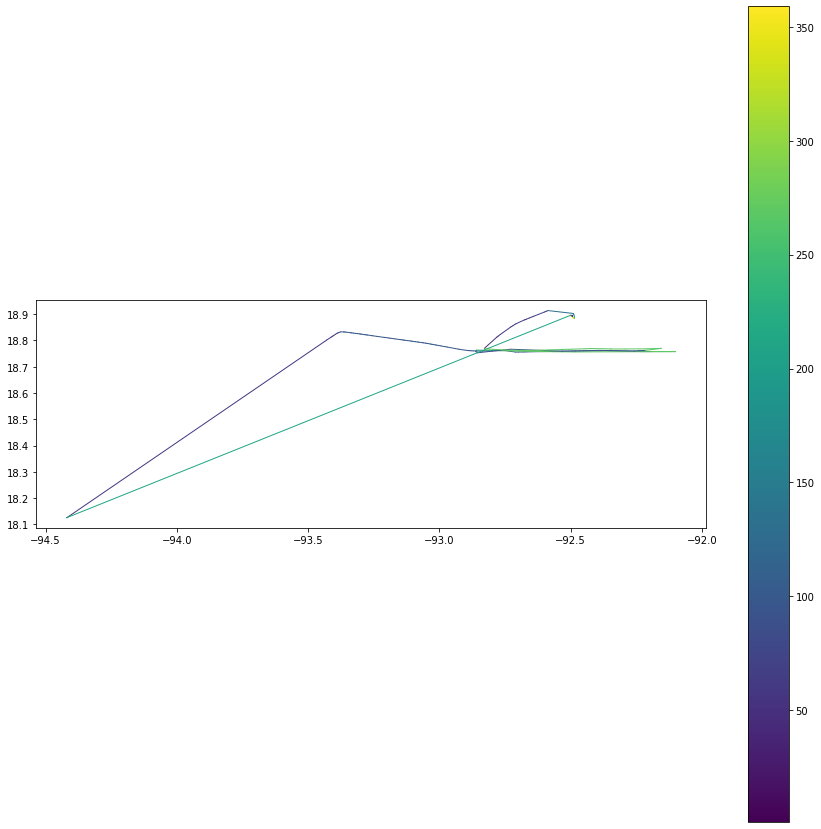

In [0]:
traj_collection.trajectories[0].plot(column='Heading', linewidth=1, capstyle='round',legend=True,figsize=(15,15))

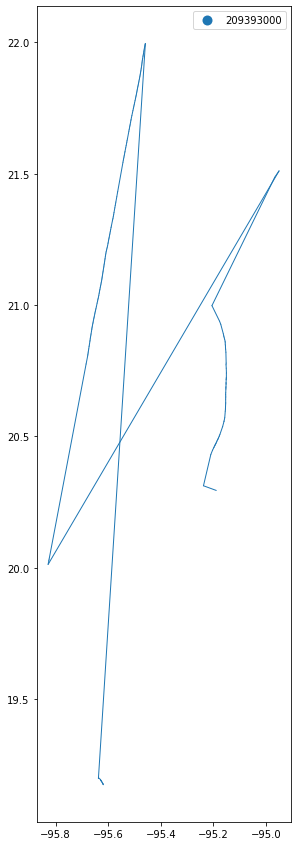

In [0]:
traj_collection.trajectories[6].plot(column='MMSI', linewidth=1, capstyle='round',legend=True,figsize=(15,15))

In [0]:
trajectories = traj_collection.trajectories
trips = traj_collection.split_by_observation_gap(timedelta(minutes=120))
print("Extracted {} individual trips from {} continuous vessel tracks".format(len(trips), len(trajectories)))

Extracted 486 individual trips from 752 continuous vessel tracks


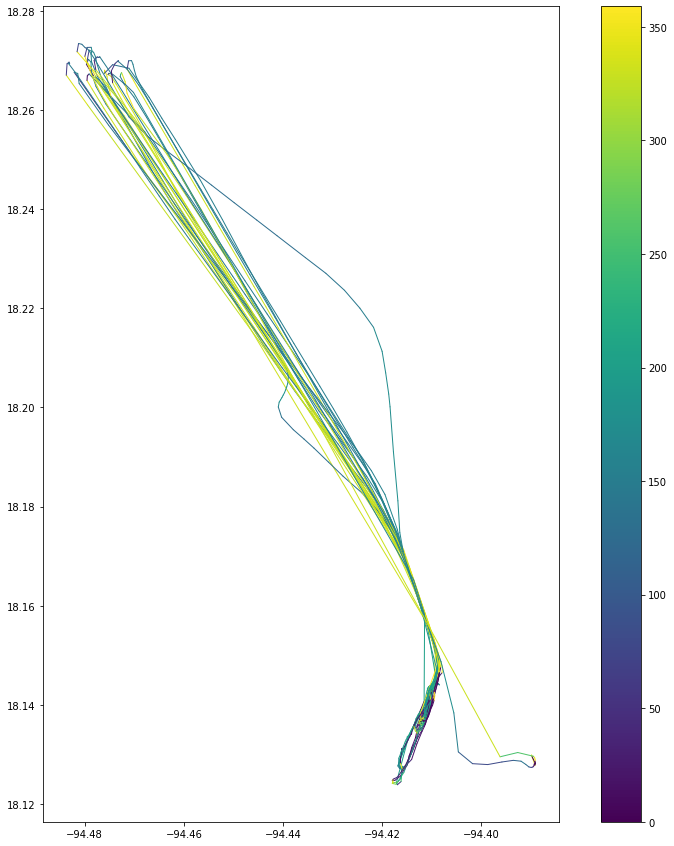

In [0]:
trips.trajectories[6].plot(column='Heading', linewidth=1, capstyle='round',legend=True,figsize=(15,15))